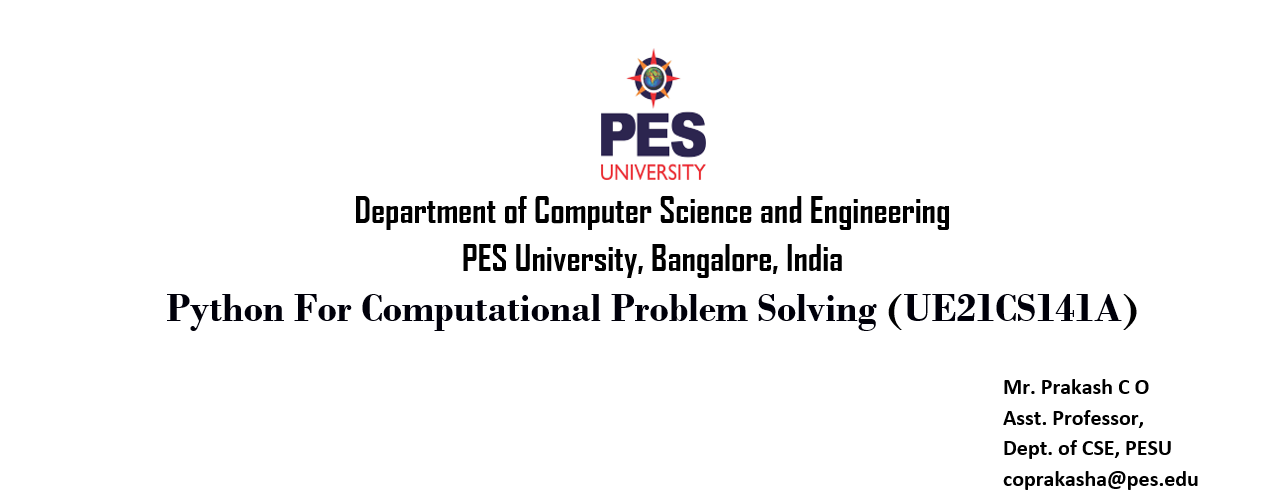

### User defined function:
A function is a self-contained block of code that performs a specific task.
Functions ideally take input, performs a set of operations and returns an output to the program that invoked it.

A function is a named piece of code. We write a sequence of Python code and then give a name to it. We can then refer and run the whole code by using its name.

###### Why do we use this concept of function? When do we use this?

•	A function is expected to do one and only thing. We call such a function cohesive. Because it has a clearly defined aim, the code will be small, neat and clean.

•	Similar functionality is normally required at number of places. If we write a function, then we can call or invoke the function without rewriting or copying the code. It makes the user’s program more readable.

•	If the code of the function has to be changed for whatever reason – make it more efficient, make it more flexible – we have to do at only one place. Thus it helps in maintenance.

•	Once tested, the function can be used with total assurance. There is no necessity of debugging the code repeatedly.

###### Types of functions:
* Built in – existing functions
* User defined – defined by user

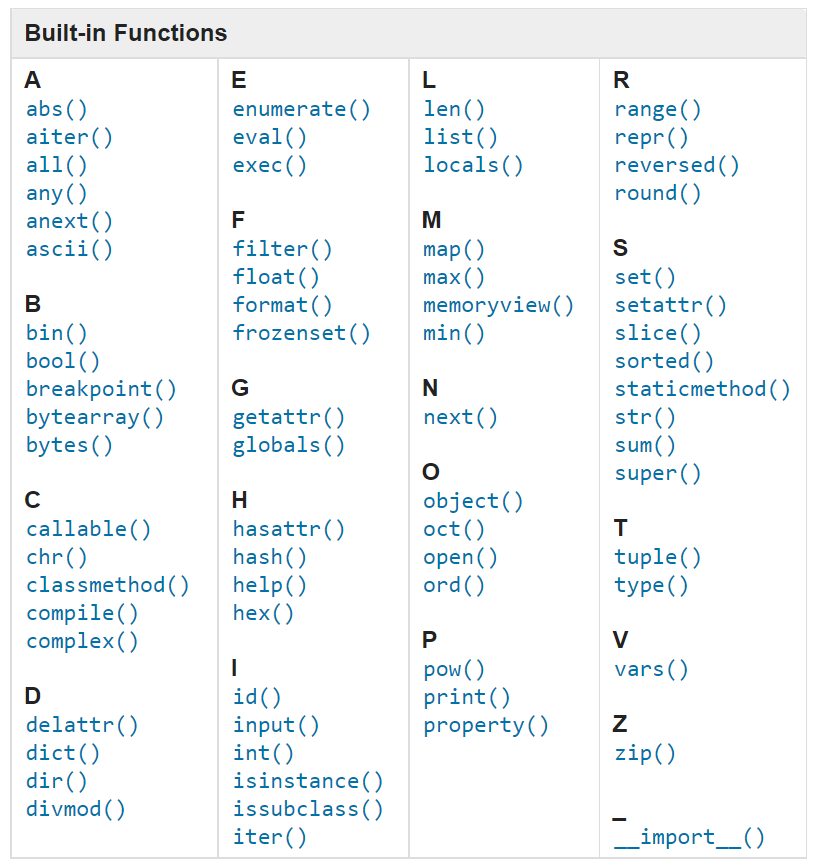

###### We use functions for the following reasons:
* Supports modularity
* Promotes reuse of code
* Enhances readability
* Debugging and maintainance becomes easier

##### Function Definition and Invocation:

###### Function Definition:

A function has two parts – leader and suite.
* The leader starts with the keyword def
* then the function name
    * function name is an identifier, start with a letter of english or _ and then followed by any number of letter of english or _ or digit
* then a pair of parentheses
* then a colon
* then the suite follows – suite can have any valid statement of Python including another function definition!
* Within the parentheses, we may have parameters – we shall discuss them at length later.



###### Example of a function definition.
Run the program under Python tutor to understand how the function definition and function call are processed.




In [1]:
# example of function definition and invocation
def foo() :
    print("I am foo")
    return

print("one")
foo()
print("two")

one
I am foo
two


#### Processing of Function Definition:   
Name of the function followed by parentheses causes a function call – this results in transfer of control to the leader of the function and then the suite is executed – after that the control comes back to the point after the function call in the user’s code.
A few more things happen when the function call is mapped to the function leader. We shall discuss them later.

In our example, leader of function foo is processed first and the function entity with the name foo is created. The suite of foo is not processed at this point. print(“one”) is called displaying the string one. Then foo is called – transferring control to the leader of foo – then the suite of foo is executed resulting in display of the string I am foo. Then the control is returned. Then print is called displaying the string two.

Note: Processing of function definition demo with http://pythontutor.com/  


#### Function Definition and Function Name – internals:
Let us examine the below code to understand two things.
* What does the function name stand for?
* What happens when the function is defined?

In [1]:
# foo : is a function; therefore callable

def foo() :
    print("I am foo")

print("one")
foo # no function call

print("two")
#print(foo) # <function foo at 0x________>

bar = foo # bar also becomes callable
#print(bar) # <function foo at 0x________>

# both give the same output
foo()
bar()

# remove foo
del foo
bar() # still works!

one
two
I am foo
I am foo
I am foo


When the function is defined, the function name becomes an interface for us to refer to the function. The function entity is stored with the name used in the definition along with the suite. Whatever is stored with the function entity remains unchanged until no name refers to it. Each entity in Python has a reference count. It is equally true of the function entity.

foo # no function call
###### This above statement does not result in a function call. The function name like a variable name is an expression. Any expression on a line is also a statement. But it does not cause a function call. To invoke a function, we do require the function call operator - a pair of parentheses.

bar = foo

###### This is like a variable assignment. Both foo and bar refer to the function entity called foo. The reference count of the function entity goes up by 1 and in this case, becomes 2.

If we display either bar or foo, we get the same output as both refer to the same function entity foo.

We can invoke the function either by using the name foo or bar. We say that both are callable. A callable is the name of a defned function or a variable holding the function name.

del foo

This statement causes the name foo to be removed and the reference count of the function entity foo to be decremented. As bar still refers to the same function entity, the reference count would not be zero. Therefore the function entity foo remains and can be called using the name bar.

bar() # still works!


##### Function call: arguments and parameters:
A function does some task for us. It requires some values to operator on. We provide them when calling a function. We put these within parentheses in the function call. We call them arguments. The arguments are always expressions. They should have some value.

add(4,5)

In the function definition, we specify variables which receive these arguments. These are called parameters. The parameters are always variables.

def add(x,y):
    return(x+y)

When the function call is made, the control is transferred to the function definition. The arguments are evaluated and copied to the corresponding parameters. This is called parameter passing by value or call by value.

In [6]:
def add(x,y):
    return(x+y)
print(add(4,5))

9


In [6]:
import math
# a, b : parameters; always variables
def hyp(a, b) :
    print("in hyp function")
    # can create variables within the function; local variables
    h = math.sqrt(a * a + b * b)
    print("hyp of triangle with sides : ", a , 'and', b, 'is ', h)

print("one")
hyp(5, 12) #5, 12 : arguments : are expressions; should have some value
hyp(3, 4)

#hyp(3, 4, 5) # TypeError: hyp() takes 2 positional arguments but 3 were given
#hyp(3) # TypeError: hyp() missing 1 required positional argument: 'b'

one
in hyp function
hyp of triangle with sides :  5 and 12 is  13.0
in hyp function
hyp of triangle with sides :  3 and 4 is  5.0


Number of arguments should match the number of parameters

hyp(3, 4, 5) # error

hyp(3) # error

The above example shows how to compute hypotenuse given the two limbs of a right angled triangle.
In this example the arguments are constants – they can be any type of expression in general. The corresponding parameters are always variables.

##### In Python, parameters do not have any fixed type. So, we say that the types are generic.

##### When the function call is made, an activation record is created which will have

* Parameters
* local variables 
    * Variables created within the suite of the function 
* return address
    * Location to which the control of the program should be transferred once the function terminates
* temporary variables
    * unnamed variables required by the translator
* return value
    * value to be passed back to the caller

At the end of the function execution, when the control returns to the calling program, the activation record is deleted and cannot be accessed again.

If we want to access a value that was calculated within the function, we must ensure to return it to the calling program explicitly.

If we call the function again in the program, a new activation is created for that instance of the function execution

In [21]:
# Lets examine, using Pythontutor
def area_rect(x,y) :
    a=x*y
    return a
a=area_rect(5,6)
print("Area of rectanle =",a)

Area of rectanle = 30


##### Function call and return mechanism:

In [12]:
import math
# a, b : parameters; always variables
# A function by default returns nothing - called None in Python

def hyp(a, b) :
    h = math.sqrt(a * a + b * b) #local to the fn

res = hyp(3, 4)
#print("h : ", h) # not available here
print(res, type(res)) # None of NoneType

None <class 'NoneType'>


In [11]:
def hyp1(a, b) :
    h = math.sqrt(a * a + b * b) #local to the fn
    return h # returns the value of the expression

res = hyp1(3, 4)
print(res, type(res)) 

5.0 <class 'float'>


##### A called function(Callee) returns the control to the caller when
* the end of the function body is reached
* the return statement is executed.

The return statement is also used to return a value to the caller. The function does not specify a return type in its definition. 

There is no default return mechanism. In the case of the function hyp, there is no return statement in the suite of the function. So, the caller is returned a notional value None of NoneType. This is similar to void functions of ‘C’.

In the second case, the function hyp1 returns h as the result. The value of this expression(in this case, a variable) is returned to the caller.


###### A function can return a value of any type. There is no restriction in Python.

In [19]:
# given two strings, find common letters.

def find_common(s1, s2):
    set1 = set(s1); 
    set2 = set(s2)
    res = ""
    for ch in set1 & set2:
        res += ch
    return res

s1 = "cattle"
s2 = "concat"
# expected output : c a t
print("common letters : ", find_common(s1, s2))

s3 = "horse"
print("common letters : ", find_common(s1, s3))

s4 = "zzzzz"
print("common letters : ", find_common(s1, s4))

s5 = "abcde"
s6 = "acdeb"
print("common letters : ", find_common(s5, s6))

common letters :  tca
common letters :  e
common letters :  
common letters :  bceda


In [4]:
# output length of words in a string
def disp_count(s):
    wordlist = s.split()
    print(wordlist)
    for word in wordlist:
        print("{} = {}".format(word,len(word)))

disp_count("we are the world")

['we', 'are', 'the', 'world']
we = 2
are = 3
the = 3
world = 5


In [3]:
# Exercise: What is the output?

def f1():
    print('cool day')
    return f3()
def f3():
    return'cool'    
        
print(f1())

cool day
cool


###### What would happen if we write statements after we have written a return statement?
Consider the following snippet of code

In [24]:
def example():
    print('an example function')
    return
    print('after return')
example()

an example function


In this function, the control returns as soon as the interpreter encounters the return statement, making the print statement after it an unreachable code.

##### Returning Multiple Values
When we return a collection of values, the interpreter puts it together into a tuple and returns it to the calling program

In [26]:
def add():
    a = 12
    b = 13
    s = a+b
    return s,a,b # becomes an unnamed tuple
sum = add()
print(type(add)) #type <class function>
print(type(sum)) #type <class tuple>
print(sum) 

<class 'function'>
<class 'tuple'>
(25, 12, 13)


### Arguments and Parameters:
#### Parameter passing by value:
We have said that parameter passing is always by copying the argument to parameter. This is called “parameter passing by value”. 

The argument could be a simple or value type like int, float or it could be a structured type or reference type like list, dict. Would these make a difference?

Let us try some simple examples to understand this concept.


In [7]:
def fn1(x):
    x = 20
    return x

a = 10
print(fn1(a))
print(a) 

20
10


In [1]:
def fn1(x):
    x = 20
    print(id(x))
a = 10
fn1(a)
print(a) # 10
print(id(a))

140735952136576
10
140735952136256


In [10]:
def fn2(x):
    x += x   #or x = x + x
    return x

a = 10
print(fn2(a))
print(a) 

20
10


In [12]:
def fn3(x):
    x = [33, 44]
    return x

a = [11, 22]
print(fn3(a))
print(a) # [11, 22] ; no change

[33, 44]
[11, 22]


In [2]:
def fn4(x):
    #x += [33, 44]     # changes a
    x = x + [33, 44]   # Not changes a
    #x.append(55)      # changes a

a = [11, 22]
fn4(a)
print(a) 

[11, 22]


In [4]:
def fn4(x):
    #x += [33, 44]
    #x = x + [33, 44]
    x.append(55)

a = [11, 22]
fn4(a)
print(a) # changes

[11, 22, 55]


In [13]:
def fn5(x):
    x[0]=33
    return x

a = [11, 22]
print(fn5(a)) #It is actually modifying the value of a
print(a)

[33, 22]
[33, 22]


In [1]:
def fn5(x):
    x[0]=33
    
a = [11, 22]
fn5(a)
print(a) # Output is [33, 22]

[33, 22]


In [15]:
def fn5(x):
    print(id(x))
    x = x + " How are You?"
    return x
    
a = "Hello"
print(fn5(a))
print(a,id(a)) # Output is Hello

1431175416496
Hello How are You?
Hello 1431175416496


#### Modify a reference: others not affected
#### Modify through a reference: others are affected

Let us check the function fn1.

In [11]:
def fn1(x):
    x = 20
    
a = 10
fn1(a)
print(a) # 10

10


The function fn1 is created. The variable a becomes 10. The function fn1 is called with the argument a whose value is 10. On the function call, the activation record of fn1 is created with the parameter x. The parameter x gets a copy of the argument a which is 10. The parameter is a local variable of the function fn1. It is changed to 20. When the end of the function is reached, the parameter is never copied to the corresponding argument. So, the variable a of the caller remains unchanged.

##### It is not possible to change an argument of a simple type by calling a function.


Let us check function fn2.

In [3]:
def fn2(x):
    x += x

a = 10
fn2(a)
print(a) # 10

10


This is similar to fn1. The parameter x which is a copy of the argument a is changed by doubling. The id of x does not change. But the argument is not affected by the function call.

Let us examine function fn3.

In [4]:
def fn3(x):  # here x is a new reference to same list a
    x = [33, 44] # A new list object is assigned to x

a = [11, 22]
fn3(a)
print(a) # [11, 22]  no change

[11, 22]


The argument in this case is a reference type. The argument a is copied to the parameter x. The id of x and id of a will be same. The elements of the list are not copied on this function call. But changing the parameter by assignment will create a new list breaking the relation of x with the list a. But the argument a is not affected.

##### Changing the parameter of the reference type does not affect the argument.


As in the last case, both a and x will refer to the same list. When we append to x, we are modifying what x refers to. So a also gets changed.

Please check all these programs on the Python tutor. I suggest that you draw the schematics and understand how the parameter passing works.


##### Changing through the parameter will affect the argument.

Let us try to understand the consequence of this parameter passing mechanism.

p, q = q, p

The above statement swaps variables p and q.

But the code below fails to swap the arguments no matter what type they are.

The copies get swapped in the function but not the arguments!

In [9]:
def swap(p, q) :
    p, q = q, p
    
x, y = 11, 22
swap(x, y)
print(x, y) #does not swap

x, y = [11, 22], [33, 44]
swap(x, y)
print(x, y) #does not swap

11 22
[11, 22] [33, 44]


###### Moral of this story: cannot write a function to swap variables in a language like Python which does parameter passing by value.

### Function Parameter and Types:

In [12]:
def fn1(a, b):  # the type of parameters a and b is generic
    print("ok")

fn1(10, 20)
fn1(True, "true")
fn1([11, 22], {33:44})
#fn1(1, 2, 3) # Error
#fn1(4) # Error

ok
ok
ok


The parameter has no specified type. The type is decided when the argument is copied on call to the function at runtime – type is determined dynamically.

###  Matching of arguments to parameters:
1. Positional Arguments
    * match the argument to the parameter based on the position
2. Keyword or Named Arguments
    * specify the parameter name in the function call
    * match the argument based on the name of the parameter
    * order of arguments does not matter


In [ ]:
def foo(a, b, c, d):
    print(a, b, c, d)

foo(1, 2, 3, 4)
foo(b = 2, d = 4, a = 1, c = 3)

# specify all the positional arguments before keyword arguments
foo(1, 2, d = 4, c = 3) # c = 3 is not an assignment
#print(c) # error

###### a) Positional arguments.
In this case, we match the argument to the corresponding parameter. We match the first argument to the first parameter, the second argument to the second parameter, and so on from left to right.

foo(1, 2, 3, 4)

###### b) Keyword arguments
In this case, we specify the name of the parameter and then symbol = and then the argument. In this case, the order of arguments does not have any effect. The symbol = does not stand for assignment. As we know, assignment is not an expression and no variable is created in the environment of the caller.

foo(b = 2, d = 4, a = 1, c = 3)

We can also use a combination of these two techniques as long as we specify all the positional arguments before keyword arguments.

foo(1, 2, d = 4, c = 3)

This feature makes the names of the parameters also an interface. As long as they have meaningful names, they will be calling the functions simple and less error prone.

###### Positional Arguments Specified by an Iterable
Positional arguments can also be passed to functions using an iterable object. Examples of iterable objects in Python include lists and tuples. The general syntax to use is:

function_name(*iterable)

Where function_name is the name of the function and iterable is the name of the iterable preceded by the asterisk * character.

An example of using a list to pass positional arguments to the complex() function is below. Note the asterisk * character is included before the term_list argument.

In [3]:
def foo(a, b, c, d):
    print(a, b, c, d)

l=[1,2,3,4]
foo(*l) #foo(1,2,3,4)

'''by using the * syntax, we're unpacking the values, which means that 
the four elements list is unpacked, and the function is called with 
four arguments 1,2,3 and 4'''

1 2 3 4


"by using the * syntax, we're unpacking the values, which means that \nthe four elements list is unpacked, and the function is called with \nfour arguments 1,2,3 and 4"

##### Positional-Only Arguments
In Python 3.8, you can use / to denote that all arguments before it must be specified by position.

In [9]:
def incr(x, /): #By adding / after x, you specify that x is a positional-only argument.
    return x + 1

incr(3.8)
#incr(x=3.8) # not allowed

4.8

You can combine regular arguments with positional-only ones by placing the regular arguments after the slash:

In [19]:
def greet(name, /, greeting="Hello"):
    return f"{greeting}, {name}"

greet("Christopher")

#greet("Christopher", greeting="Awesome job")

'Hello, Christopher'

Positional-only arguments nicely complement keyword-only arguments. In any version of Python 3, you can specify keyword-only arguments using the star (*). Any argument after * must be specified using a keyword:

In [16]:
def to_fahrenheit(*, celsius):
    return 32 + celsius * 9 / 5

#to_fahrenheit(40)
to_fahrenheit(celsius=40)

104.0

In greet(), the slash is placed between name and greeting. This means that name is a positional-only argument, while greeting is a regular argument that can be passed either by position or by keyword.

The benefit of using positional-only arguments is that you can more easily refactor your functions. In particular, you can change the name of your parameters without worrying that other code depends on those names.

### Function Parameters: Default Parameters:
What does print method display at the end of the record? What separator do we get between the fields? We know that we get a newline and a space respectively by default. We also know that we can use keyword parameter and specify values for these two parameters in the call to the print function.

###### How do we specify the default parameter?

* Default Parameter can be associated with a value.
* If the argument is not provided for this parameter, then default value will be used.
* If the argument is provided for this parameter, then default value is not considered.
* Default value for a parameter is part of the function definition.


In [18]:
def multiply(a, b = 10):
    return a + b

print(multiply(10, 20))
print(multiply(30))

30
40


###### The default parameter as part of the function definition. The rightmost parameters can be default. 
The function multiply can be called with one or two arguments. If the function is called with two arguments, the default parameter does not come into picture. The given argument is copied to b.

If the function is called with one argument, then the default parameter 10 is copied to b before the execution of the function starts.

###### The default parameter is processed when the leader is processed and is stored as an attribute of the function definition and is not part of the activation record.

###### Default value being a variable

In [11]:
x = 22
# default parameter can be a variable provided it is defined before the function definition
def foo(a = x) :
    print("foo : ", a)

x = 33 # will have no effect on the default stored in the function foo for a
foo(11) #11
foo() #22

foo :  11
foo :  22


So, in this case, a takes the present value of x which is 22. Change of x later will have no effect on the default parameter stored as an attribute of the function definition.

The behavior of the default appears to be unusual if the default parameter is of reference type. Let us examine the next example.

In [15]:
# parameters : default

def foo(x, a = []):
    a.append(x)
    print(a)

foo(10) #[10]
foo(20) #[10, 20]

z = [30, 40]
foo(50, z) 	#[30, 40, 50]
foo(60) 	# [10, 20, 60]

[10]
[10, 20]
[30, 40, 50]
[10, 20, 60]


def foo(x, a = []):

In the above leader statement the parameter has a default which is a list – a reference type. That reference will remain with the function entity. The default parameter is copied to a only if no argument is passed for a. if the list is changed, then that change will remain to persist and will manifest the next time the call is made without argument for a. 


### *args and **kwargs in Python

In Python, we can pass a variable number of arguments to a function using special symbols. There are two special symbols:

1) *args (Variable positional arguments/Non-Keyword Arguments)

2) **kwargs (Keyword Arguments)

###### 1) *args (Non-Keyword Arguments)

The special syntax *args in function definitions in python is used to pass a variable number of arguments to a function. It is used to pass a non-key worded, variable-length argument list. 

Using the *, the parameter that we associate with the * becomes an iterable(i.e., tuple) meaning you can do things like iterate over it.

###### There are a few rules.
1) There can be only one such parameter in a function.

###### def foo(*p, *q):   is an error

2) This follows all the positional parameters.


In [2]:
def fn(x,y,*arg) :
    print(x,y,arg)

fn(1,2)
fn(1,2,3,4)

def fn(*arg,x,y) :
    print(arg,x,y)

#fn(1,2,3,4) # TypeError: fn() missing 2 required keyword-only arguments: 'x' and 'y'
fn(1,2,x=3,y=4)

1 2 ()
1 2 (3, 4)
(1, 2) 3 4


3) This parameter cannot be used as a keyword parameter.

We cannot specify the parameter name and give a tuple of arguments. The second example shows how to use variable parameter to find the smallest in number of arguments assuming that there is at least one argument.

Example:

The full syntax of print() is:

print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)

* objects - object to the printed. * indicates that there may be more than one object
* sep - objects are separated by sep. Default value: ' '
* end - end is printed at last
* file - must be an object with write(string) method. If omitted it, sys.stdout will be used which prints objects on the screen.
* flush - If True, the stream is forcibly flushed. Default value: False


###### Example 1:
We use print() to display any number of arguments.
* print(1)
* print(1,2)
* print(1,2,3)

###### Example 2:  Similarly if we wish to write a function which will examine an arbitrary number of strings, and returns the length of the longest string. 
In this situation , it may not be possible to know ahead of time how many arguments we will be providing to the function. In such cases we can make use of Variable number of arguments.

In [10]:
def len_long(*s):
    max = 0
    print(s,type(s))
    for strgs in s:
        if len(strgs) > max:
            max = len(strgs)
    return max
x=len_long('narendraModi','RahulGandhi','AmitShah','Yogi')
print(x)

(['narendraModi', 'RahulGandhi', 'AmitShah', 'Yogi'],) <class 'tuple'>
4


In [13]:
def f2(*args):
    print(args)
f2(5)
f2(10,"strings")

(5,)
(10, 'strings')


In [14]:
def f3(*args):
    print(args)
val=(5,6,7)
f3(val)  # equivalent to f3((5,6,7),) or f3((5,6,7))
f3(*val) # equivalent to f3(5,6,7)

((5, 6, 7),)
((5, 6, 7),)
(5, 6, 7)


###### 2) **kwargs - Keyword Arguments (key value pairs as arguments:)

The special syntax **kwargs in function definitions is used to pass a keyworded, variable-length argument list. 

We use the name kwargs with the double star. The reason is because the double star allows us to pass through keyword arguments (and any number of them).

key value pairs as arguments use '**' to represent key value pair instead of '*'.

They are collected in a dictionary. Collection and unpacking work in the same way as the previous one.


In [21]:
def f3(a,b,*args,**kwarg):
    print("a and b values are",a,b)
    print("args=",args,type(args))
    print("kwarg=",kwarg,type(kwarg))
    
f3(2,3,4,5,"Hi",red='r',green='g',blue='b',x=2,y=4.4)    
# f3(a=2,b=3,4,5,"Hi",red='r',green='g',blue='b',x=2,y=4.4)
# SyntaxError: positional argument follows keyword argument

a and b values are 2 3
args= (4, 5, 'Hi') <class 'tuple'>
kwarg= {'red': 'r', 'green': 'g', 'blue': 'b', 'x': 2, 'y': 4.4} <class 'dict'>


### Nested functions (Inner functions)
Inner functions, also known as nested functions, are functions that you define inside other functions. 

In Python, this kind of function has direct access to variables and names defined in the enclosing function. 

Inner functions have many uses, most notably as closure factories and decorator functions.

Encapsulation: You use inner functions to protect them from everything happening outside of the function, meaning that they are hidden from the global scope.
Let’s look at the following example,

In [2]:
def outer(num1):
    def inner_inc(n):  # inner function hidden from outer code
        return n + 1
    
    num2 = inner_inc(num1) # call internally inner function
    print(num1, num2)

#inner_inc(10)  # Try calling inner function from here i.e., from outside
                # NameError: name 'inner_inc' is not defined
outer(10)

10 11


In [27]:
def outer():
    print("this is an outer funtion")
    
    def inner():
        print("this is an inner function")
    
    inner()

outer()
#inner()   #NameError: name 'inner' is not defined

this is an outer funtion
this is an inner function


The function inner exists only when the function outer is called/invoked. Just like any variable that is used in within a function call, the function inner would only exist in the activation record of the outer function.

Here’s an example of how to create and use a more elaborate inner function:

In [1]:
def factorial(number):
    # Validate input
    if not isinstance(number, int):
        raise TypeError("Sorry. 'number' must be an integer.")
    if number < 0:
        raise ValueError("Sorry. 'number' must be zero or positive.")

    def inner_factorial(number): # inner function
        if number <= 1:
            return 1
        return number*inner_factorial(number-1)
    
    return inner_factorial(number)  # call inner function and return its result

print(factorial(4)) # Call the outer function.

24


The main advantage of using this pattern is that, by performing all the argument checking in the outer function, you can safely skip error checking in the inner function and focus on the computation at hand.

###### Providing Encapsulation
A common use case of inner functions arises when you need to protect, or hide, a given function from everything happening outside of it so that the function is totally hidden from the global scope. This kind of behavior is commonly known as encapsulation.

In [3]:
def increment(number):
    def inner_increment():
        return number + 1
    return inner_increment()

increment(10)

11

### Scope and Lifetime of variables:

Scope of a variable indicates the accessibility of the variable in the program.

Scope of a variable is confined to the level of indentation in which it was created and any level greater than itself. The variable is not accessible to codes that have lesser indentation.

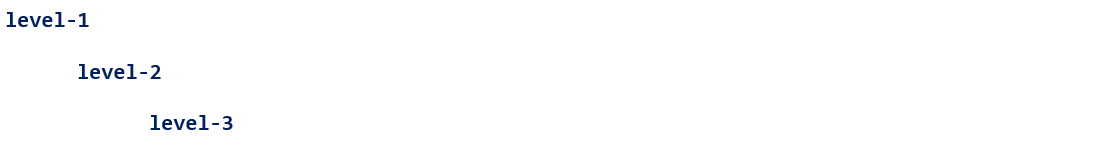
The variable has scope if it can be seen – is visible – in the current suite.    

Lifetime or life of a variable indicates the time frame during which the variable and value is present in the memory.

Life of a variable is about existence of the variable – the variable has a location and therefore some value. The variable loses its life when the reference count becomes 0.

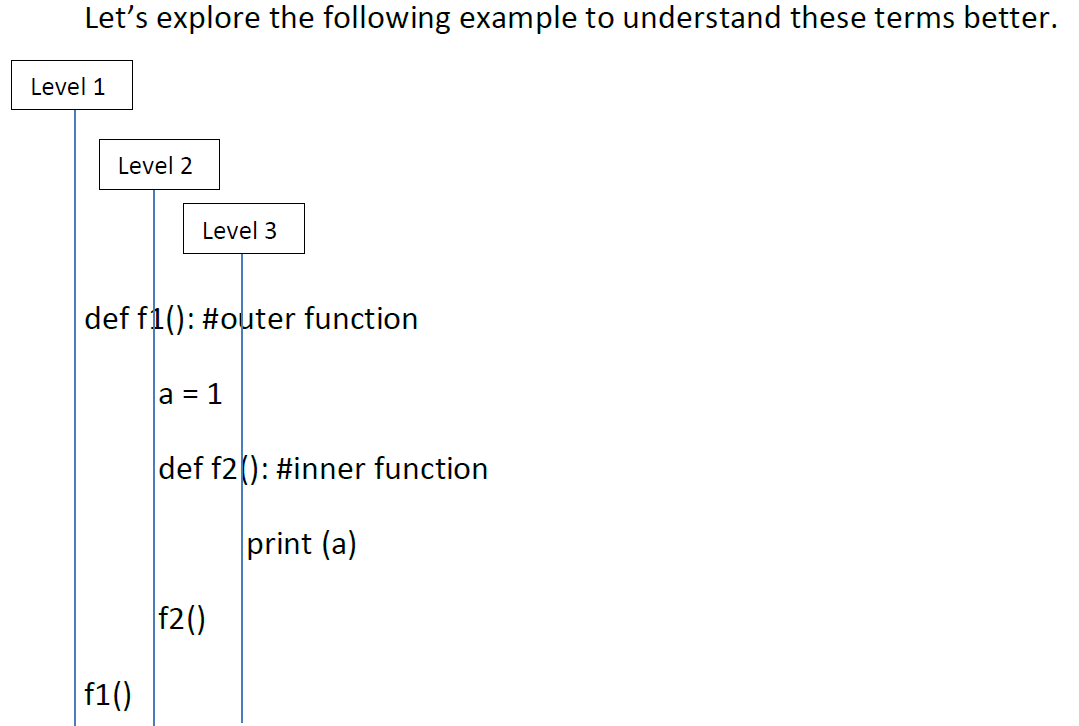

In [1]:
def f1(): #outer function
    a = 1
    def f2(): #inner function
        print (a)
    f2()

f1()

1


For the above program:

* Any variable created in level 1 of indentation is visible in itself all greater levels (1,2,3)
* Any variable created in level 2 of indentation is visible in itself all greater levels 2,3 and not level 1
* Any variable created in level 3 is only visible in level 3

More Examples to illustrate the scope of variables:

In [2]:
def f1():   #outer function
    x = 1   # variable defined in the outer function
    def f2(a):   #inner function
        x = 4    #will create a new variable in the inner function
        print(a+x)
    print(x)    # prints the value of x of outer function
    f2(2)
    print(x)
f1()

1
6
1


Note: Whenever there is a local variable with the same name as that of a global/outer variable, the compiler/interpreter gives precedence to the local variable.

In [5]:
def f1():    #outer function
    a = [3,4]
    print(a)
    def f2():     #inner function
        a = [2,6]
        print(a)
    f2()
    print(a)
f1()

[3, 4]
[2, 6]
[3, 4]


In [6]:
def f1():    #outer function
    a = [3]
    print(a[0])
    def f2():     #inner function
        a[0] = 2
        print(a[0])
    f2()
    print(a[0])
f1()

3
2
2


In [7]:
# Nested functions can access the variables of the enclosing scope
def outer(a):
    def inner():
        print(a) #prints “hello”
    inner()
outer("hello")

hello


#### Global, Local and nonlocal Variables:

All names created outside of functions are global. 

All names created within a function by default are local to those functions.

Variables are local by default. So when variables are defined inside a function definition, they are local to the function by default. Thereby any changes to the local variables inside the function will not be reflected outside the function.

All variables have the scope of the block, where they are declared and defined. They can only be used after the point of their declaration.

Variables in Python are implicitly declared by defining them, i.e. the first time a value is assigned to a variable, that variable is declared and has automatically the data type of the object which has to be assigned to it.

If we want to access variables outside the scope that it was defined in, we use the keyword global
Consider the following example :

In [12]:
x = 5
def f3():
    x = 10
    print("local x:", x)

f3()
print("global x:", x)

local x: 10
global x: 5


The interpreter always looks for the variable that’s accessible easily.
x in the function activation record can be accessed by the print function in f3 faster than x in the global frame

###### If we want to access and modify the global variable within a function, all we have to do is use the keyword global before modifying it as shown in the code below

In [14]:
'''A function can use the value of a global variable without modifying it. 
To change a global variable, the function should declare that it wants to play 
with the global variable.
'''
a = 1
def f1(): 
    global a # causes the function to access the global variable and
             # does not create a new one
    a = 5 #accessing and modifying global variable
    print ('in f1 a =',a)
    
print ('before fn call a =',a)
f1()
print ('after fn call a =',a)

before fn call a = 1
in f1 a = 5
after fn call a = 5


In [15]:
a=10 #global variable

def f1():
    a=20 #local Variable
    print("a =",a) #20

def f2():
    global a
    a=99 #accessing and modifying global variable
    print("a =",a) #99

print("a =",a) #10
f1()
f2()
print("a =",a) #99

a = 10
a = 20
a = 99
a = 99


##### Nonlocal:

While global keyword always accesses the variables created in the global frame, 
while using nested functions, how can we access and modify the local variable of an outer fruntion?

If we want to access and modify a local variable created in an outer function by the inner function, we use the keyword nonlocal

In [18]:
def outer():
    x = 10 #local
    print('within outer x:',x)
    
    def inner():
        nonlocal x
        x = 20  # x from outer funtion
        print('within inner x:',x)
        
    inner()
    print('within outer x:',x)

x = 5 #global
print('Before outer x:',x)
outer()
print('After outer x:',x)

Before outer x: 5
within outer x: 10
within inner x: 20
within outer x: 20
After outer x: 5


References:
1.	function_parameters_3.pdf – Prof. N S Kumar, Dept. of CSE, PES University.
2.	https://www.w3schools.com/python
3.	https://docs.python.org/
